#### Yusuf Goga

## Student Performance in Exams

### Introduction

We divide the score into a few ranks and determine which characteristic has a more substantial impact on the score in order to determine which component may have an impact on the student's performance. The following are the independent variables:

1. gender: student sex
2. Race and ethnicity: Students' nationalities
3. Parental education level: parents' highest degree of education
4. Having meal prior to an exam (normal or abnormal)
5. Test preparation course : complete or not complete before test

Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

Reading the data into the pandas dataframe

In [2]:
df = pd.read_csv("data.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Some column names are too long, renaming of column names to make them all similar and easier to read.

In [3]:
df.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"pre"},inplace=True)
df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data types in our data

In [4]:
df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

Performance of each field for male and female.

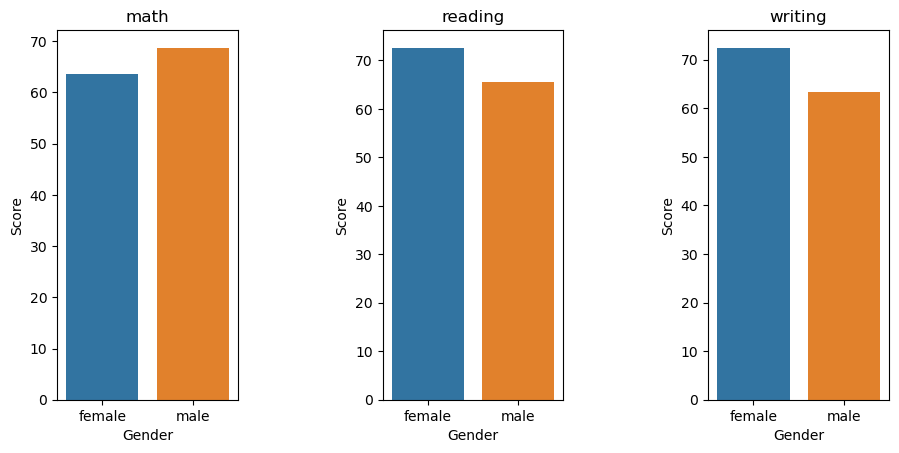

In [20]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = df.groupby("gender")[list(df.columns[-3:])[idx]].describe()
    sns.barplot(x = gender_df.index, y = gender_df.loc[:,"mean"].values)
    plt.ylabel("Score")
    plt.xlabel("Gender")
    plt.title(list(df.columns[-3:])[idx])
    
plt.show()

Performance of each field for ethnicity group.

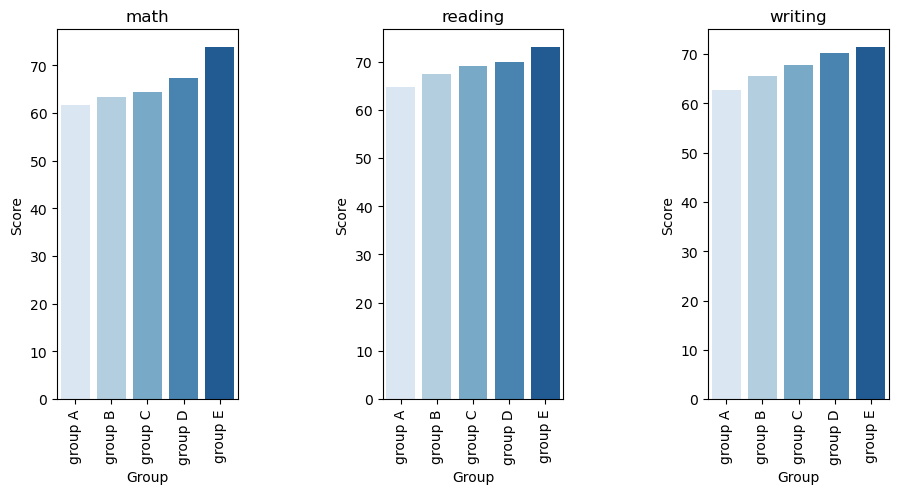

In [22]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = df.groupby("ethnicity")[list(df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Blues")
    plt.xlabel("Group")
    plt.ylabel("Score")
    plt.xticks(rotation=90)
    plt.title(list(df.columns[-3:])[idx])
plt.show()

Obviously, group E has best performance for all the fields, and group A is the worst.

Let's see the result of score and test preparation.

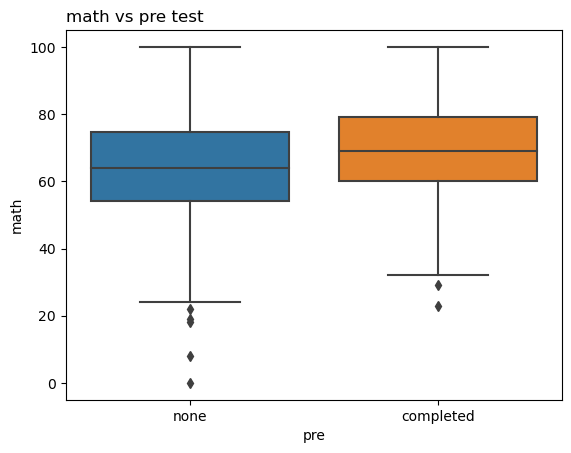

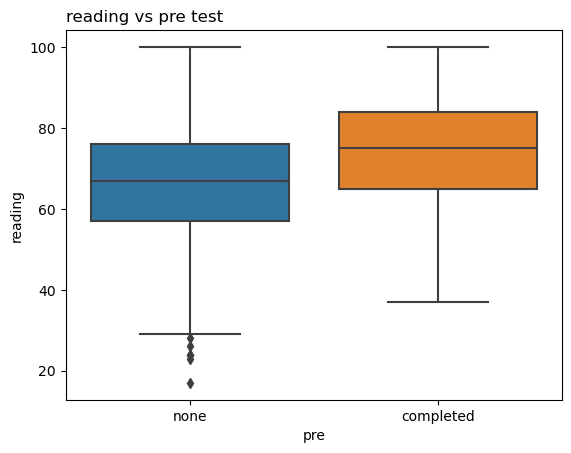

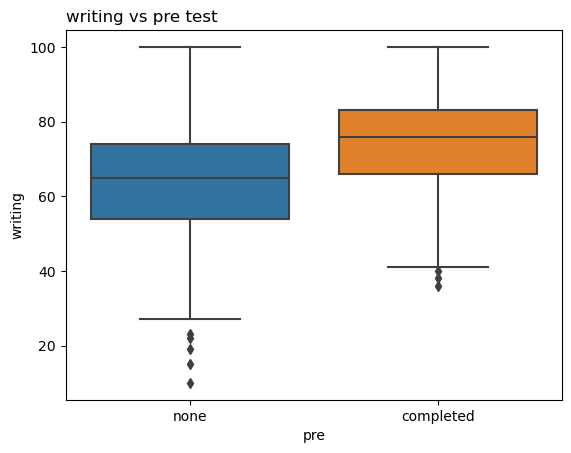

In [24]:
for item in df.columns[-3:]:
    sns.boxplot(x=df["pre"], y=df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

If students study for the test in advance, the score dispersion became more concentrated, and the average score also improved.

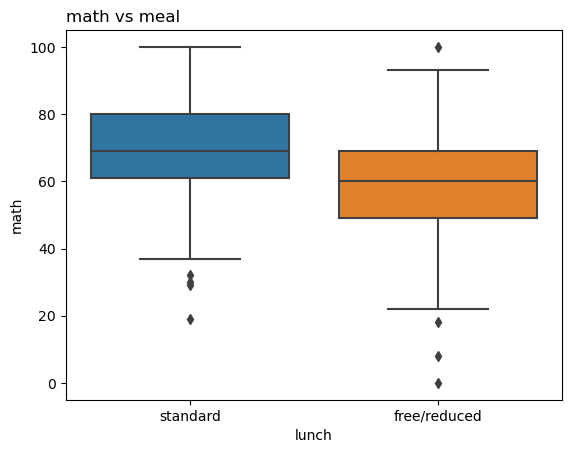

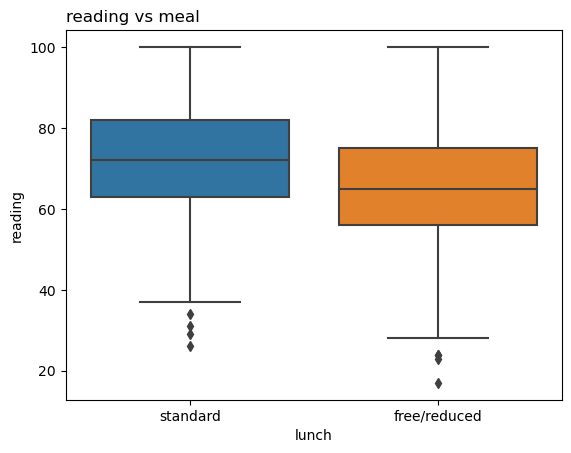

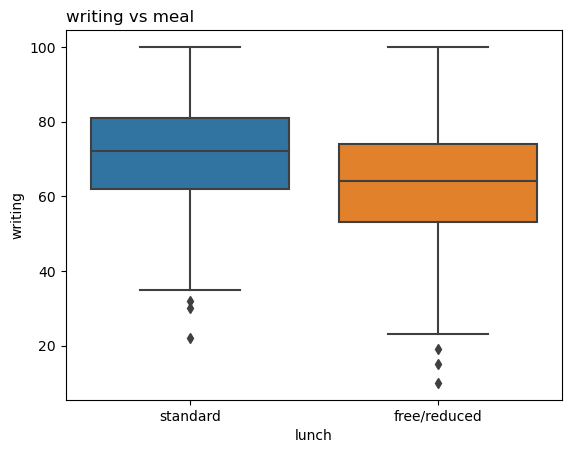

In [28]:
for item in df.columns[-3:]:
    sns.boxplot(x=df["lunch"], y=df[item])
    plt.title(item+" vs meal", loc="left")
    plt.show()

Fair enough! When students eat consistently, it shows that they achieve higher marks.


We immediately check the data type. Then, we apply a label encoder to some features.

In [29]:
labelencoder = LabelEncoder()
train_df = df.copy()
train_df["parent_education"] = labelencoder.fit_transform(train_df["parent_education"])
train_df["pre"] = labelencoder.fit_transform(train_df["pre"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75


The features "parent_education", "lunch", "pre" are labeled by numbers now, which makes them easier to use in this analysis. Now we use Kmeans algorithm to classify the dataset.

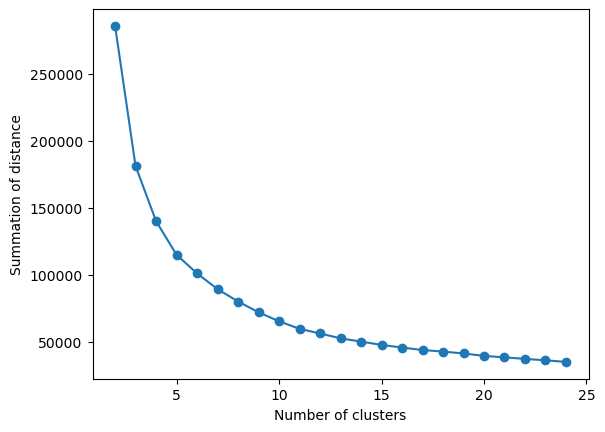

In [30]:
kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

Above is known as the elbow method which tells us how mnay clusters to use to achive the best possible results. In this case we will use 8 as the elbow point, and then classify our data.

In [31]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
df["classification"] = kmeans_label
df.head(10)

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,5
1,female,group C,some college,standard,completed,69,90,88,6
2,female,group B,master's degree,standard,none,90,95,93,4
3,male,group A,associate's degree,free/reduced,none,47,57,44,2
4,male,group C,some college,standard,none,76,78,75,6
5,female,group B,associate's degree,standard,none,71,83,78,6
6,female,group B,some college,standard,completed,88,95,92,4
7,male,group B,some college,free/reduced,none,40,43,39,7
8,male,group D,high school,free/reduced,completed,64,64,67,0
9,female,group B,high school,free/reduced,none,38,60,50,2


Now that the data has been classified, lets see the performance of each cluster.

In [33]:
class_df = df.groupby("classification")[df.columns[-4:-1]].mean()
class_df

,math,reading,writing
classification,,,
0,58.078947,67.796053,68.013158
1,82.680272,82.272109,80.891156
2,47.759124,51.437956,49.043796
3,60.503401,58.217687,56.612245
4,88.738636,93.318182,93.306818
5,73.304965,69.312057,67.531915
6,68.450331,78.470199,78.198675
7,32.135135,35.972973,33.594595


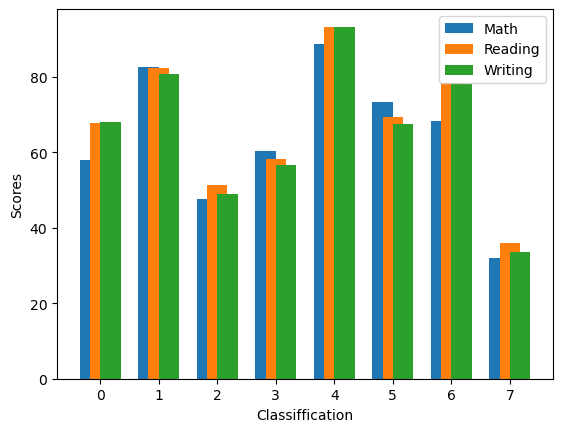

In [34]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

Up to now, it's obviously that all subject of cluster has the same trend, so we choose the average of all sbjects to rank the clusters.

In [35]:
class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([4, 1, 6, 5, 0, 3, 2, 7], dtype='int64', name='classification')

In [36]:
rank

classification
4    91.787879
1    81.947846
6    75.039735
5    70.049645
0    64.629386
3    58.444444
2    49.413625
7    33.900901
Name: total_ave_score, dtype: float64

For top 5 ranks, the average score all passed, Rank[0] is the best cluster, Rank[1] is second one and so on.

Now, we can find out the correlation between the performance of students and features. Let's plot pie chart to see whether parents education level can affect the performance or not.

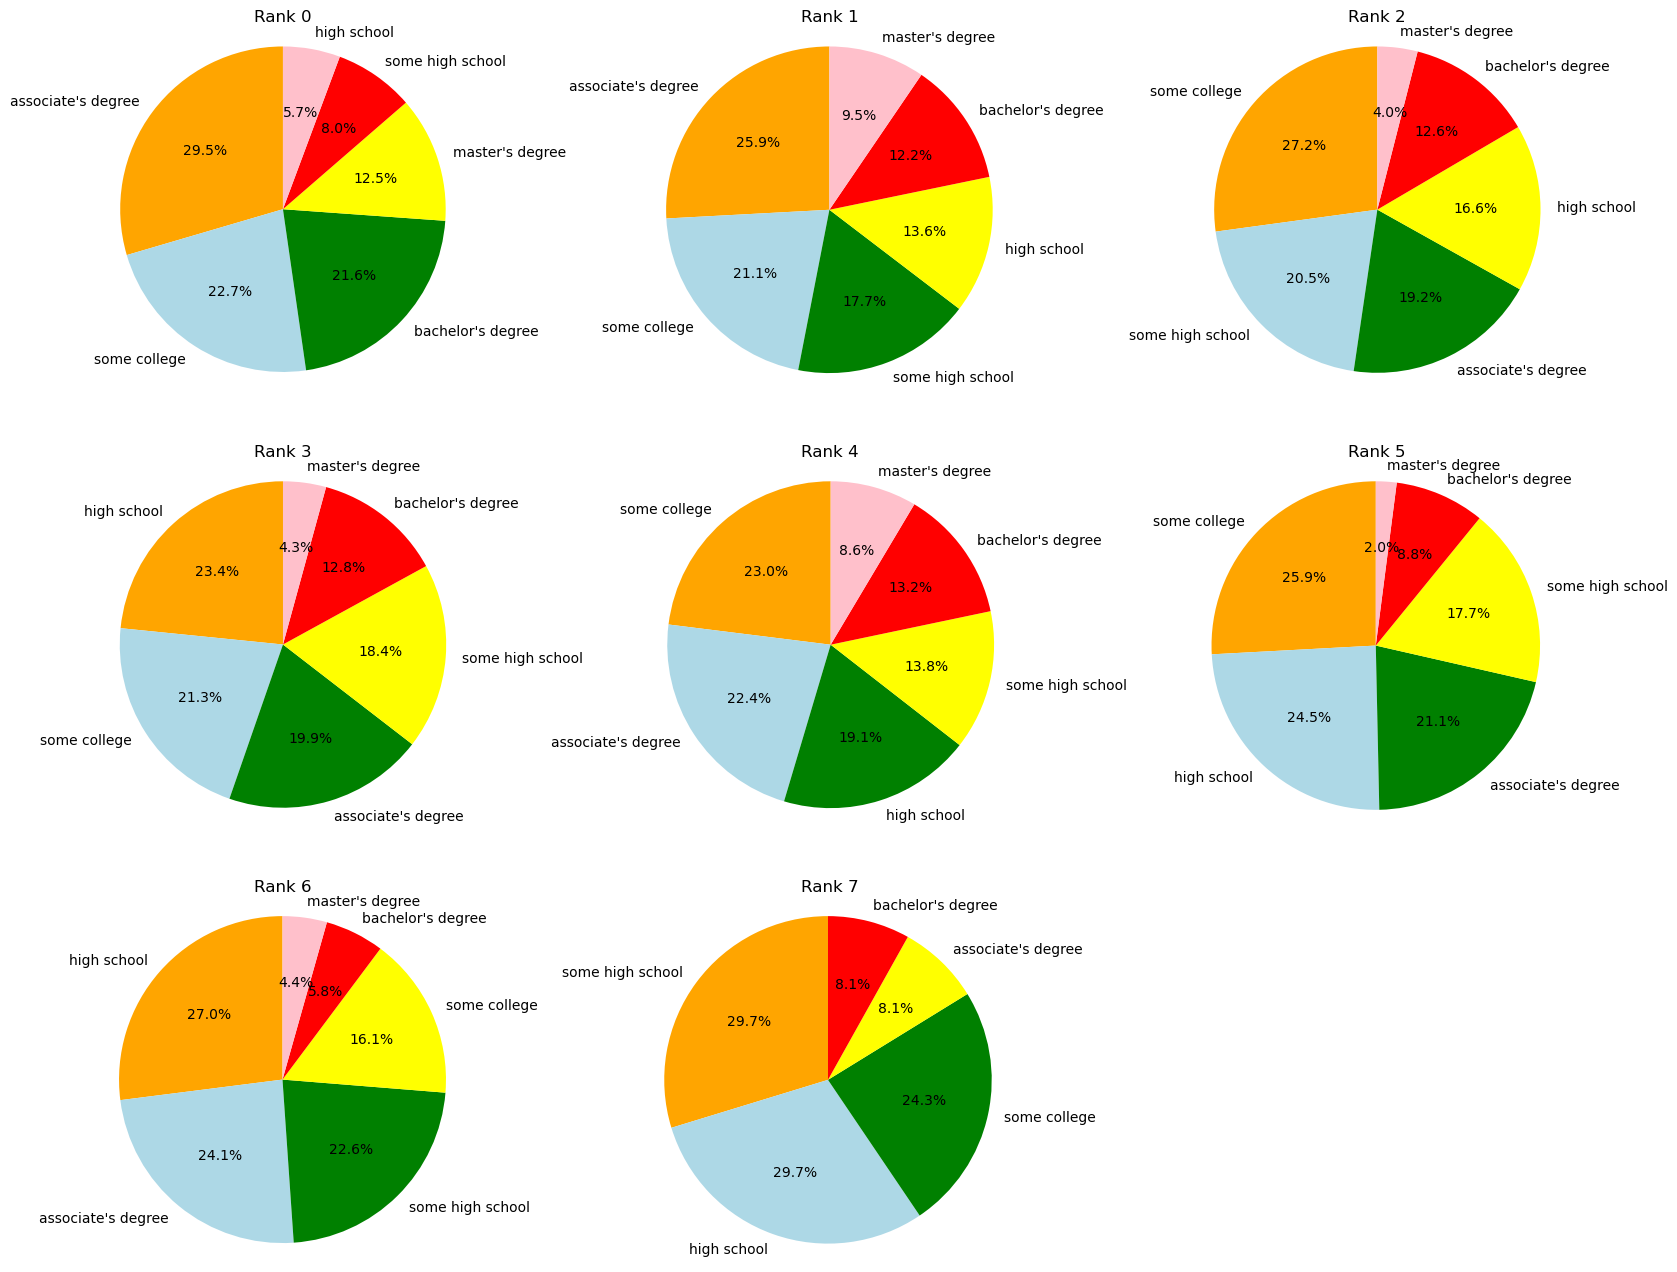

In [39]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = df[df["classification"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parent_education")

Let's define the high degree of education. Parents having bachelor or master degree are high-level educated. So we focus on these two terms.

As pie chart were shown above, we can easily understand the ratio of high-degree education. For the rank0, its ratio is around 32%. In addition, there are no differences between rank1 to rank3, and the ratio are around 15~17%. Finally, the ratio is only 8% in rank7.

We calculated the average score of each rank before, so we can say that parent's education affect the score but not obviously, because there are still 70%~80% parents without high education degree.

Lets look at the test preparation.

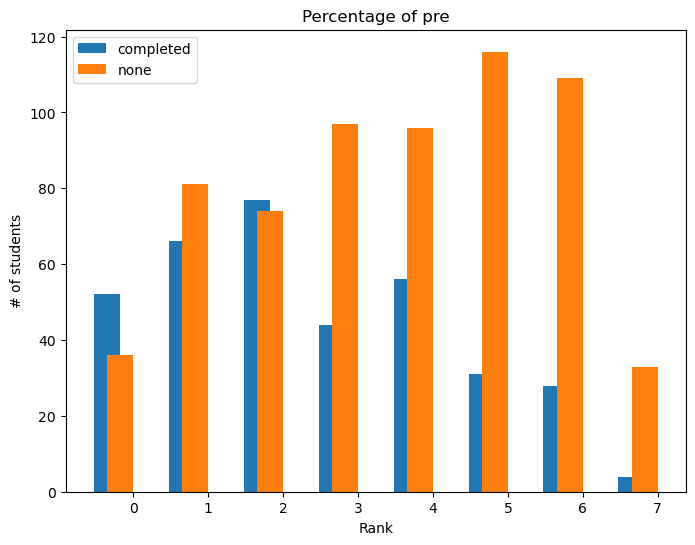

In [43]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class"+ str(idx)
        num = df[df["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
            else:
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
   
    percentage_of_column = df[df["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("pre") 

Over 50% of students in rank0 completed the test preparation course, and normally there is about 70~80% students in rank7 hadn't finished course. It is say that preparation course can help students get better score.

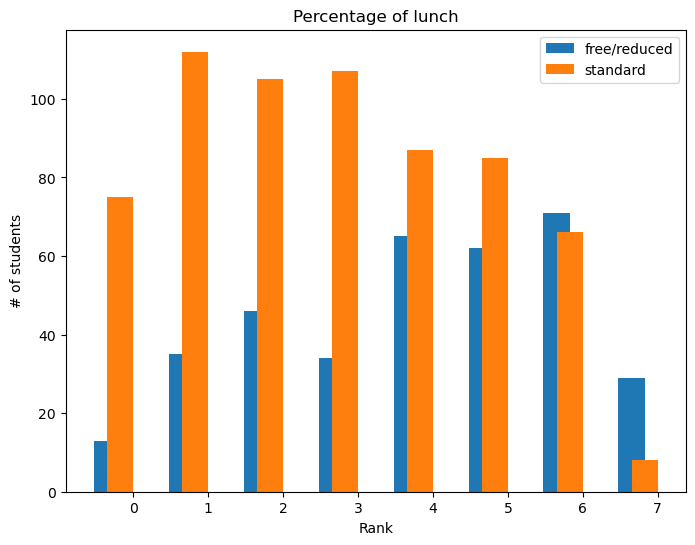

In [44]:
plot_bar_chart("lunch")

Also the same trend as "pre". Students who had lunch before test got better score. That is, it's hard to get good performance without eating.

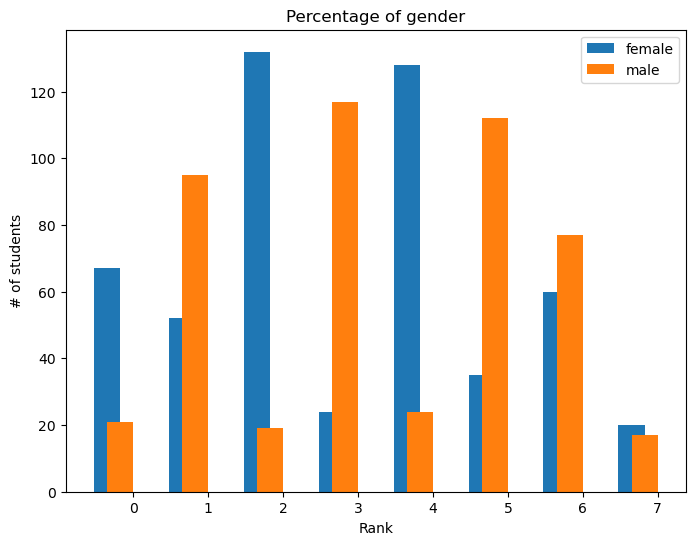

In [45]:
plot_bar_chart("gender")

It's hard to say that the male is better than female.

## Conclusion

Below are a few conclusions:

1. Although not the most significant factor, parents' education level may have an impact on students' performance.

2. Completing the preparatory course is advantageous.

3. Having meals is important to students, and it is also the most significant one.

4. There is no connection between gender and student grade.

In conclusion, students who wish to perform well on tests should eat adequate food and complete the pre test course for the test.